# Biodiversity

## About Data

There are two data used in the form of CSV. The data is named ['observations.csv'](https://drive.google.com/file/d/1LMJy1Nny1sYI7LJiEahihxH84ovghKsE/view?usp=sharing) which is data recording the number of species from 4 national parks in the USA. The data consists of 3 columns ['scientific_name', 'park_name', 'observations'] . Data ['species_info.csv'](https://drive.google.com/file/d/1bU9GTd5_QHOxovF5FNydMYK2HyPyrnYg/view?usp=sharing) is data that consists of 4 columns ['category', 'scientific_name', 'common_names', 'conservation_status'].

The purpose of this analysis is to determine which species will soon experience changes in the conservation status indicator.

| Colomns | Meaning |
| --- | --- |
| scientific_name | Contains the scientific name of the species. |
| park_name | This is the national park where the species lives. |
| observations | Number of recorded populations of the species. |
| category  | This is a type of species universally. |
| common_names | is the common name used for the species |
| conservation_status | conservation status of each species. |

| Conservation Status | Describe |
| --- | --- |
| Endangered | Indicates that the species is very few and will experience extinction |
| Threatened | Indicates that the species is in a threatening condition, but there are still more species than species with Endangered status in terms of population. |
| Species of Concern | Indicates the species is being monitored |
| In Recovery | The species is currently in captivity. |
| Nan/ Not Conservation | This species still has a large population and is not threatened with extinction. |

In [30]:
#import __package__
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Clening Data
At this time, the data before processing data must be checked first related to each data. Either from Observation data or Species data.
1. Checking the data structure (amount of data, relationship between columns)
2. Checking the type of data and missing data.
3. Data Cleaning

In [31]:
# Import Data
df_observation = pd.read_csv('observations.csv')
df_species = pd.read_csv('species_info.csv')
# menggabungkan dua tabel
df_species_observation = pd.merge(left=df_observation, right=df_species , left_on= 'scientific_name', right_on='scientific_name')
df_species_observation.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",NaN
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,NaN


In the above process, the data is combined using the primary key (scientific_name). From this result, we can see the data as above.

In [32]:
# membuat status conservation_status Nan menjadi 'Not Conservation'
new_df = df_species_observation.fillna('Not Conservation')
new_df.head()

,scientific_name,park_name,observations,category,common_names,conservation_status
0,Vicia benghalensis,Great Smoky Mountains National Park,68,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conservation
1,Vicia benghalensis,Yosemite National Park,148,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conservation
2,Vicia benghalensis,Yellowstone National Park,247,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conservation
3,Vicia benghalensis,Bryce National Park,104,Vascular Plant,"Purple Vetch, Reddish Tufted Vetch",Not Conservation
4,Neovison vison,Great Smoky Mountains National Park,77,Mammal,American Mink,Not Conservation


### Menghilangkan Data Null
Eliminating Null data in the conservation status column, null in the data indicates the condition of the species is still safe.

In [33]:

df_species_nona = df_species_observation.dropna(subset = ['conservation_status'])
# cheking data null
print (df_species_nona.isnull().sum())
#cheking data info
print (df_species_nona.info())
#cheking unique value of conservation_status
print (df_species_nona.conservation_status.unique())

df_species_nona.head()

scientific_name        0
park_name              0
observations           0
category               0
common_names           0
conservation_status    0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 880 entries, 120 to 25607
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   scientific_name      880 non-null    object
 1   park_name            880 non-null    object
 2   observations         880 non-null    int64 
 3   category             880 non-null    object
 4   common_names         880 non-null    object
 5   conservation_status  880 non-null    object
dtypes: int64(1), object(5)
memory usage: 48.1+ KB
None
['Species of Concern' 'Threatened' 'Endangered' 'In Recovery']


,scientific_name,park_name,observations,category,common_names,conservation_status
120,Zizia trifoliata,Yosemite National Park,135,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
121,Zizia trifoliata,Yellowstone National Park,238,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
122,Zizia trifoliata,Bryce National Park,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
123,Zizia trifoliata,Great Smoky Mountains National Park,80,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders",Species of Concern
204,Camissonia sierrae ssp. alticola,Bryce National Park,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern


## Statistic
In this section, a boxplot visualization is used to make it easier.

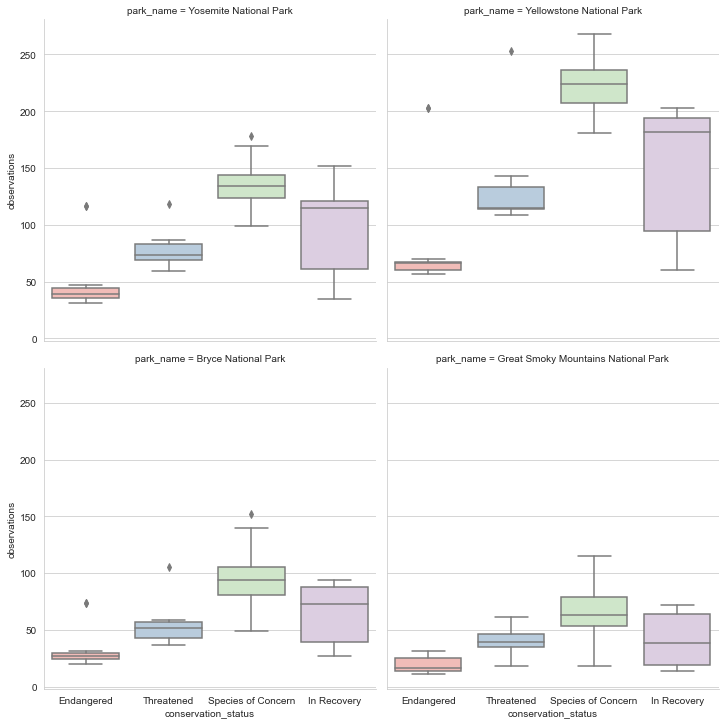

In [34]:
sns.set_palette ('Pastel1')
sns.catplot(kind = 'box', data = df_species_nona, x = 'conservation_status',
            y = 'observations',col = 'park_name',col_wrap=2,
            order = ['Endangered','Threatened','Species of Concern','In Recovery'])
plt.show()

Berdasarkan gambar diatas dapat dilihat bahwa distribusi data dari setiap conservation status pada setiap taman nasional berbeda - beda.  Kita juga dapat melihat ada outlier hampir disetiap boxplot.

### Total Number of Species Population at Certain Conservation Status

The aim is to find out the total population of each national park in certain conservation status.

In [35]:
df_park2 = df_species_observation.groupby(['park_name','conservation_status']).observations.sum().reset_index()
df_park2.head()

,park_name,conservation_status,observations
0,Bryce National Park,Endangered,619
1,Bryce National Park,In Recovery,388
2,Bryce National Park,Species of Concern,17011
3,Bryce National Park,Threatened,591
4,Great Smoky Mountains National Park,Endangered,393


In [36]:
df_park_pivot =  df_park2.pivot (columns = 'park_name',index = 'conservation_status',values = 'observations').reset_index()
df_park_pivot.head()

park_name,conservation_status,Bryce National Park,Great Smoky Mountains National Park,Yellowstone National Park,Yosemite National Park
0,Endangered,619,393,1558,943
1,In Recovery,388,248,889,582
2,Species of Concern,17011,11735,40677,24539
3,Threatened,591,440,1459,849


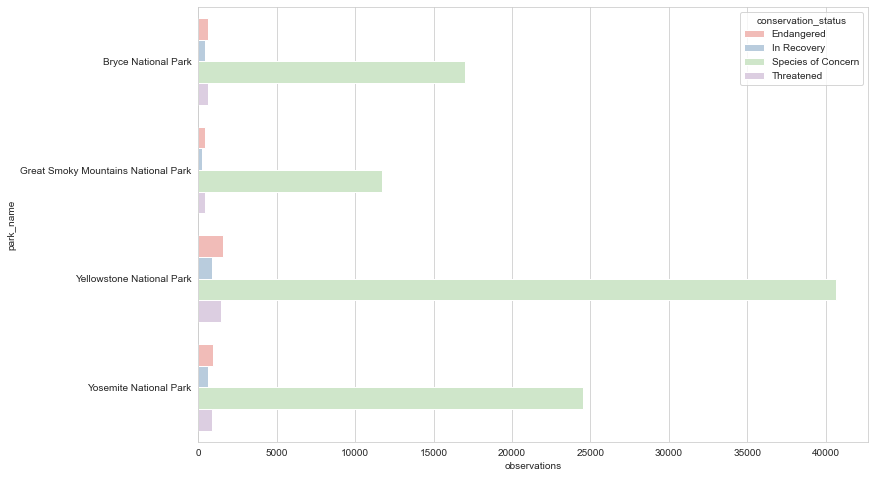

In [37]:
# Membuat Grafik
plt.figure(figsize =(12,8))
sns.set_style('whitegrid')
sns.set_palette ('Pastel1')
sns.barplot (data = df_park2 , y = 'park_name', x = 'observations',hue = 'conservation_status',ci = None)

plt.show()

## Knowing Species that are nearing extinction status.

In [38]:
# median 
status_median = df_species_nona.groupby(['park_name','conservation_status']).observations.median().reset_index(name= 'med_population')
status_median

,park_name,conservation_status,med_population
0,Bryce National Park,Endangered,27.0
1,Bryce National Park,In Recovery,73.0
2,Bryce National Park,Species of Concern,94.0
3,Bryce National Park,Threatened,52.0
4,Great Smoky Mountains National Park,Endangered,16.5
5,Great Smoky Mountains National Park,In Recovery,38.5
6,Great Smoky Mountains National Park,Species of Concern,63.0
7,Great Smoky Mountains National Park,Threatened,39.0
8,Yellowstone National Park,Endangered,66.0
9,Yellowstone National Park,In Recovery,181.5


From the data above, each national park has a different median population for each conservation status. But for Endangered status in all national parks, it has the lowest median population.

In [39]:
# Tabel 
endangered_med = status_median[status_median.conservation_status=='Endangered']
endangered_med

,park_name,conservation_status,med_population
0,Bryce National Park,Endangered,27.0
4,Great Smoky Mountains National Park,Endangered,16.5
8,Yellowstone National Park,Endangered,66.0
12,Yosemite National Park,Endangered,39.5


In [40]:
# Determine the type and name of any animal that is below the population median value of each species.
def BNP_ext (Park_name,Med):
    c = df_species_observation[['park_name','scientific_name','observations', 'category', 'common_names']][
                            (df_species_observation.park_name == Park_name)&
                               (df_species_observation.conservation_status=='Endangered') &
                               (df_species_observation.observations < Med )]
    return(c)


list_park2 =endangered_med.park_name.tolist()
list_med_1 =endangered_med.med_population.tolist()

### List of Near Extinction Species in Bryce National Park. (Below Median)

In [41]:
BNP_ext (Park_name =list_park2[0],Med = list_med_1[0])

,park_name,scientific_name,observations,category,common_names
1403,Bryce National Park,Picoides borealis,24,Bird,Red-Cockaded Woodpecker
5898,Bryce National Park,Etheostoma percnurum,25,Fish,Duskytail Darter
11243,Bryce National Park,Geum radiatum,25,Vascular Plant,"Mountain Avens, Spreading Avens"
14472,Bryce National Park,Chasmistes liorus,23,Fish,June Sucker
15086,Bryce National Park,Noturus baileyi,22,Fish,Smoky Madtom
19500,Bryce National Park,Vermivora bachmanii,20,Bird,"Bachman's Warbler, Bachman's Wood Warbler"
19958,Bryce National Park,Ovis canadensis sierrae,22,Mammal,Sierra Nevada Bighorn Sheep
23162,Bryce National Park,Grus americana,24,Bird,Whooping Crane


### List of Near Extinction Species in Great Smoky Mountains National Park. (Below Median)

In [42]:
BNP_ext (Park_name =list_park2[1],Med = list_med_1[1])

,park_name,scientific_name,observations,category,common_names
1401,Great Smoky Mountains National Park,Picoides borealis,15,Bird,Red-Cockaded Woodpecker
2479,Great Smoky Mountains National Park,Rana sierrae,11,Amphibian,Sierra Nevada Yellow-Legged Frog
4602,Great Smoky Mountains National Park,Canis rufus,13,Mammal,Red Wolf
6020,Great Smoky Mountains National Park,Canis lupus,15,Mammal,Gray Wolf
6022,Great Smoky Mountains National Park,Canis lupus,15,Mammal,"Gray Wolf, Wolf"
6032,Great Smoky Mountains National Park,Canis lupus,14,Mammal,Gray Wolf
6034,Great Smoky Mountains National Park,Canis lupus,14,Mammal,"Gray Wolf, Wolf"
20974,Great Smoky Mountains National Park,Gymnogyps californianus,15,Bird,California Condor
21153,Great Smoky Mountains National Park,Myotis sodalis,14,Mammal,"Indiana Bat, Indiana Or Social Myotis"
23160,Great Smoky Mountains National Park,Grus americana,13,Bird,Whooping Crane


### List of Near Extinction in Yellowstone National Park. (Below Median) 	


In [43]:
BNP_ext (Park_name =list_park2[2],Med = list_med_1[2])

,park_name,scientific_name,observations,category,common_names
1402,Yellowstone National Park,Picoides borealis,64,Bird,Red-Cockaded Woodpecker
2477,Yellowstone National Park,Rana sierrae,60,Amphibian,Sierra Nevada Yellow-Legged Frog
4603,Yellowstone National Park,Canis rufus,60,Mammal,Red Wolf
6023,Yellowstone National Park,Canis lupus,60,Mammal,Gray Wolf
6025,Yellowstone National Park,Canis lupus,60,Mammal,"Gray Wolf, Wolf"
11241,Yellowstone National Park,Geum radiatum,63,Vascular Plant,"Mountain Avens, Spreading Avens"
14473,Yellowstone National Park,Chasmistes liorus,65,Fish,June Sucker
19502,Yellowstone National Park,Vermivora bachmanii,58,Bird,"Bachman's Warbler, Bachman's Wood Warbler"
20975,Yellowstone National Park,Gymnogyps californianus,64,Bird,California Condor
23161,Yellowstone National Park,Grus americana,57,Bird,Whooping Crane


### 	List of Near Extinction Species in Yosemite National Park. (Below Median) 

In [44]:
BNP_ext (Park_name =list_park2[3],Med = list_med_1[3])

,park_name,scientific_name,observations,category,common_names
4601,Yosemite National Park,Canis rufus,34,Mammal,Red Wolf
6008,Yosemite National Park,Canis lupus,35,Mammal,Gray Wolf
6010,Yosemite National Park,Canis lupus,35,Mammal,"Gray Wolf, Wolf"
10726,Yosemite National Park,Myotis grisescens,39,Mammal,Gray Myotis
14475,Yosemite National Park,Chasmistes liorus,35,Fish,June Sucker
15087,Yosemite National Park,Noturus baileyi,31,Fish,Smoky Madtom
19957,Yosemite National Park,Ovis canadensis sierrae,39,Mammal,Sierra Nevada Bighorn Sheep
21070,Yosemite National Park,Glaucomys sabrinus coloratus,36,Mammal,"Carolina Northern Flying Squirrel, Northern Fl..."
21152,Yosemite National Park,Myotis sodalis,36,Mammal,"Indiana Bat, Indiana Or Social Myotis"
23163,Yosemite National Park,Grus americana,37,Bird,Whooping Crane


The data above shows which species will experience extinction shortly because their population is below the population median at the Endangered conservation status.

## Knowing Species approaching Endangered status.

In [45]:
threatened_med = status_median[status_median.conservation_status=='Threatened']
threatened_med

,park_name,conservation_status,med_population
3,Bryce National Park,Threatened,52.0
7,Great Smoky Mountains National Park,Threatened,39.0
11,Yellowstone National Park,Threatened,115.0
15,Yosemite National Park,Threatened,73.0


In [46]:
def BNS_ext (Park_name,Med):
    c = df_species_observation[['park_name','scientific_name','observations', 'category', 'common_names']][
                            (df_species_observation.park_name == Park_name)&
                               (df_species_observation.conservation_status=='Threatened') &
                               (df_species_observation.observations < Med )]
    return(c)


list_park2 =threatened_med.park_name.tolist()
list_med_1 =threatened_med.med_population.tolist()

### Species List Will Be Endangered in Bryce National Park.

In [47]:
BNS_ext (Park_name =list_park2[0],Med = list_med_1[0])

,park_name,scientific_name,observations,category,common_names
1774,Bryce National Park,Rana draytonii,37,Amphibian,California Red-Legged Frog
2517,Bryce National Park,Anaxyrus canorus,43,Amphibian,Yosemite Toad
14653,Bryce National Park,Isotria medeoloides,42,Vascular Plant,Small Whorled Pogonia
14781,Bryce National Park,Erimonax monachus,46,Fish,Spotfin Chub
22244,Bryce National Park,Ursus arctos horribilis,38,Mammal,Grizzly Bear


### Species List Will Be Endangered in Great Smoky Mountains National Park

In [48]:
BNS_ext (Park_name =list_park2[1],Med = list_med_1[1])

,park_name,scientific_name,observations,category,common_names
2516,Great Smoky Mountains National Park,Anaxyrus canorus,30,Amphibian,Yosemite Toad
13056,Great Smoky Mountains National Park,Myotis septentrionalis,34,Mammal,"Northern Long-Eared Bat, Northern Myotis"
14655,Great Smoky Mountains National Park,Isotria medeoloides,36,Vascular Plant,Small Whorled Pogonia
14783,Great Smoky Mountains National Park,Erimonax monachus,18,Fish,Spotfin Chub
23022,Great Smoky Mountains National Park,Noturus flavipinnis,36,Fish,Yellowfin Madtom


### Species List Will Be Endangered in Yellowstone National Park

In [49]:
BNS_ext (Park_name =list_park2[2],Med = list_med_1[2])

,park_name,scientific_name,observations,category,common_names
2519,Yellowstone National Park,Anaxyrus canorus,114,Amphibian,Yosemite Toad
14652,Yellowstone National Park,Isotria medeoloides,114,Vascular Plant,Small Whorled Pogonia
14782,Yellowstone National Park,Erimonax monachus,109,Fish,Spotfin Chub
18566,Yellowstone National Park,Spiraea virginiana,114,Vascular Plant,Virginia Spiraea
18642,Yellowstone National Park,Oncorhynchus clarkii henshawi,111,Fish,Lahontan Cutthroat Trout


### Species List Will Be Endangered inYosemite National Park

In [50]:
BNS_ext (Park_name =list_park2[3],Med = list_med_1[3])

,park_name,scientific_name,observations,category,common_names
871,Yosemite National Park,Oncorhynchus mykiss,59,Fish,Rainbow Trout
1773,Yosemite National Park,Rana draytonii,69,Amphibian,California Red-Legged Frog
14780,Yosemite National Park,Erimonax monachus,69,Fish,Spotfin Chub
18564,Yosemite National Park,Spiraea virginiana,62,Vascular Plant,Virginia Spiraea
23020,Yosemite National Park,Noturus flavipinnis,72,Fish,Yellowfin Madtom


Based on the table and data above, you can see a list of species in the Threatened status that will soon become Endangered if not appropriately handled. The above species are species with population numbers below the median species with Threatened status.

## Knowing Species approaching Threatened status.

In [51]:
concern_med = status_median[status_median.conservation_status=='Species of Concern']
concern_med 

,park_name,conservation_status,med_population
2,Bryce National Park,Species of Concern,94.0
6,Great Smoky Mountains National Park,Species of Concern,63.0
10,Yellowstone National Park,Species of Concern,224.0
14,Yosemite National Park,Species of Concern,134.0


In [52]:
def BNT_ext (Park_name,Med):
    c = df_species_observation[['park_name','scientific_name','observations', 'category', 'common_names']][
                            (df_species_observation.park_name == Park_name)&
                               (df_species_observation.conservation_status=='Species of Concern') &
                               (df_species_observation.observations < Med )]
    return(c)


list_park2 =concern_med.park_name.tolist()
list_med_1 =concern_med.med_population.tolist()

### List species will be approaching Threatened status in Bryce National Park.

In [53]:
BNT_ext (Park_name =list_park2[0],Med = list_med_1[0])

,park_name,scientific_name,observations,category,common_names
122,Bryce National Park,Zizia trifoliata,87,Vascular Plant,"Meadow Alexanders, Three-Leaved Golden Alexanders"
204,Bryce National Park,Camissonia sierrae ssp. alticola,84,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp..."
378,Bryce National Park,Tofieldia glabra,70,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia"
622,Bryce National Park,Dichanthelium acuminatum var. acuminatum,87,Vascular Plant,Tapered Rosette Grass
957,Bryce National Park,Rugelia nudicaulis,93,Vascular Plant,Rugel's Ragwort
...,...,...,...,...,...
23393,Bryce National Park,Myotis leibii,84,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed..."
23499,Bryce National Park,Botaurus lentiginosus,74,Bird,American Bittern
24749,Bryce National Park,Sorex preblei,71,Mammal,"Malheur Shrew, Preble's Shrew"
24970,Bryce National Park,Progne subis,82,Bird,Purple Martin


### List species will be approaching Threatened status inGreat Smoky Mountains National Park

In [54]:
BNT_ext (Park_name =list_park2[1],Med = list_med_1[1])

,park_name,scientific_name,observations,category,common_names
623,Great Smoky Mountains National Park,Dichanthelium acuminatum var. acuminatum,62,Vascular Plant,Tapered Rosette Grass
958,Great Smoky Mountains National Park,Rugelia nudicaulis,58,Vascular Plant,Rugel's Ragwort
1074,Great Smoky Mountains National Park,Pandion haliaetus,58,Bird,Osprey
1075,Great Smoky Mountains National Park,Pandion haliaetus,58,Bird,"Osprey, Western Osprey"
1642,Great Smoky Mountains National Park,Hemitremia flammea,54,Fish,Flame Chub
...,...,...,...,...,...
23394,Great Smoky Mountains National Park,Myotis leibii,49,Mammal,"Eastern Small-Footed Bat, Eastern Small-Footed..."
24748,Great Smoky Mountains National Park,Sorex preblei,59,Mammal,"Malheur Shrew, Preble's Shrew"
24903,Great Smoky Mountains National Park,Chlidonias niger,46,Bird,Black Tern
24968,Great Smoky Mountains National Park,Progne subis,47,Bird,Purple Martin


### List species will be approaching Threatened status in Yellowstone National Park

In [55]:
BNT_ext (Park_name =list_park2[2],Med = list_med_1[2])

,park_name,scientific_name,observations,category,common_names
207,Yellowstone National Park,Camissonia sierrae ssp. alticola,201,Vascular Plant,"Mono Hot Springs Evening Primrose, Mono Hot Sp..."
377,Yellowstone National Park,Tofieldia glabra,220,Vascular Plant,"Smooth Bog-Asphodel, Smooth Tofieldia"
959,Yellowstone National Park,Rugelia nudicaulis,186,Vascular Plant,Rugel's Ragwort
1078,Yellowstone National Park,Pandion haliaetus,223,Bird,Osprey
1079,Yellowstone National Park,Pandion haliaetus,223,Bird,"Osprey, Western Osprey"
...,...,...,...,...,...
24681,Yellowstone National Park,Monotropa uniflora,181,Vascular Plant,"Indian Pipe, Indian-Pipe"
24751,Yellowstone National Park,Sorex preblei,193,Mammal,"Malheur Shrew, Preble's Shrew"
24900,Yellowstone National Park,Chlidonias niger,218,Bird,Black Tern
25269,Yellowstone National Park,Lophocolea appalachiana,222,Nonvascular Plant,Appalachian Lophocolea


### List species will be approaching Threatened status in Yosemite National Park

In [56]:
BNT_ext (Park_name =list_park2[3],Med = list_med_1[3])

,park_name,scientific_name,observations,category,common_names
620,Yosemite National Park,Dichanthelium acuminatum var. acuminatum,123,Vascular Plant,Tapered Rosette Grass
956,Yosemite National Park,Rugelia nudicaulis,120,Vascular Plant,Rugel's Ragwort
1096,Yosemite National Park,Iris missouriensis,127,Vascular Plant,"Rocky Mountain Iris, Western Blue Flag, Wild I..."
1194,Yosemite National Park,Riparia riparia,125,Bird,Bank Swallow
1195,Yosemite National Park,Riparia riparia,125,Bird,"Bank Swallow, Sand Martin"
...,...,...,...,...,...
23498,Yosemite National Park,Botaurus lentiginosus,120,Bird,American Bittern
24680,Yosemite National Park,Monotropa uniflora,129,Vascular Plant,"Indian Pipe, Indian-Pipe"
24737,Yosemite National Park,Gymnorhinus cyanocephalus,109,Bird,Pinyon Jay
24971,Yosemite National Park,Progne subis,110,Bird,Purple Martin


From the data above, what needs to be considered is that several species will experience a change in status to Threatened.

## Conclusion

From the data processed above, it can be seen a list of species that will experience a change in conservation status shortly. Hence, the above species need to be monitored not to experience a significant decline in population numbers. 